In [29]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, permutation_test, shapiro, levene, ttest_ind
from pingouin import welch_anova
import matplotlib.pyplot as plt

In [30]:
rutabd1 = 'MÉTRICAS_AREAVOLCURVEESPESORUGOSI_BIOMARCCADORES_SUIZA.xlsx'  #archivo1
rutabd2 = 'HIPOCAMPO_AMIGDALA_ASEG_BIOMARCADORES_SUIZA.xlsx' #archivo2
metricas = pd.read_excel(rutabd1, sheet_name=0) #extraigo solo la primera hoja en ambos
hipocampo = pd.read_excel(rutabd2, sheet_name=0)

In [31]:
metricas

,lh.aparc.area,lh_caudalanteriorcingulate_area,lh_entorhinal_area,lh_isthmuscingulate_area,lh_medialorbitofrontal_area,lh_middletemporal_area,lh_parahippocampal_area,lh_posteriorcingulate_area,lh_rostralanteriorcingulate_area,BrainSegVolNotVent
0,CTR_001/,895,344,1137,1879,3080,616,989,942,1097191
1,CTR_006/,605,365,810,1444,2689,612,997,730,909285
2,CTR_008/,495,445,925,1622,2509,511,1127,571,1015293
3,CTR_009/,365,330,949,1738,2765,593,1032,763,1024225
4,CTR_010/,333,331,737,1455,2227,522,795,453,827608
...,...,...,...,...,...,...,...,...,...,...
90,S_047,696,340,1097,1919,3133,478,1243,691,1000187
91,S_048,490,329,1105,1673,2483,554,1082,886,841443
92,S_049,463,327,780,1669,2491,568,987,528,842354
93,S_050,612,352,798,1778,2661,514,962,848,965636


In [32]:
hipocampo

,Measure:volume,Lateral-nucleus,Basal-nucleus,Accessory-Basal-nucleus,Anterior-amygdaloid-area-AAA,Central-nucleus,Medial-nucleus,Cortical-nucleus,Corticoamygdaloid-transitio,Paralaminar-nucleus,Whole_amygdala
0,CTR_001/,6.278181e+02,4.170133e+02,2.425152e+02,4.954774e+01,3.940475e+01,1.342333e+01,2.290474e+01,1.538930e+02,4.722978e+01,1.613750e+03
1,CTR_006/,5.789891e+02,3.798405e+02,2.550422e+02,4.248559e+01,3.628293e+01,1.638205e+01,2.704375e+01,1.666038e+02,4.304777e+01,1.545718e+03
2,CTR_008/,5.653896e+02,4.055797e+02,2.412015e+02,4.647498e+01,3.543857e+01,1.867795e+01,2.191914e+01,1.573719e+02,4.530344e+01,1.537357e+03
3,CTR_009/,6.238758e+02,4.079157e+02,2.420850e+02,4.621515e+01,3.914487e+01,1.329256e+01,2.214926e+01,1.509123e+02,4.606608e+01,1.591657e+03
4,CTR_010/,5.567733e+02,3.438448e+02,1.983749e+02,3.866194e+01,2.576831e+01,1.007607e+01,1.769619e+01,1.365512e+02,3.752263e+01,1.365269e+03
...,...,...,...,...,...,...,...,...,...,...,...
91,SAN_055,7.241592e+08,4.867678e+08,2.909467e+08,6.123554e+07,3.732774e+07,1.354700e+07,2.865930e+07,1.881081e+08,5.560036e+07,1.886352e+09
92,S_S031,6.368644e+08,3.766628e+08,2.095703e+08,5.096020e+07,3.344205e+07,1.194792e+07,1.894761e+07,1.381283e+08,4.280994e+07,1.519333e+09
93,S_S032,5.276715e+08,3.528467e+08,1.840704e+08,3.809287e+07,2.505587e+07,1.036522e+07,1.482954e+07,1.377293e+08,4.579427e+07,1.336456e+09
94,S_S034,5.516608e+08,3.828089e+08,2.209718e+08,4.015917e+07,3.372859e+07,1.047818e+07,1.715573e+07,1.442310e+08,4.505252e+07,1.446247e+09


In [33]:
def convert(string):
    return 'SO' if string.startswith('SO') else string.split('_')[0].split('-')[0] 

def contador_tipo(bd2,nombre_columna):
    identificadores = bd2[nombre_columna] #se extrae la columna de interes 
    prefijos = identificadores.apply(convert)
    conteo = prefijos.value_counts().reset_index()#ya aqui se cuentan los prefijos 
    conteo.columns = ['Tipo', 'Cantidad'] #hacemos una tablita sencilla
    return conteo


PARA LA BD2

In [34]:
hipocampoC=contador_tipo(hipocampo,'Measure:volume')
total_pacientes = hipocampoC['Cantidad'].sum()
print("total pacientes: "+str(total_pacientes))
hipocampoC

total pacientes: 96


,Tipo,Cantidad
0,SAN,28
1,S,28
2,CTR,18
3,DCL,10
4,GK,7
5,DTA,3
6,GW,1
7,SO,1


PARA LA BD1

In [35]:
metricasC=contador_tipo(metricas,'lh.aparc.area')
total_pacientes1 = metricasC['Cantidad'].sum()
print("total pacientes: "+str(total_pacientes1))
metricasC


total pacientes: 95


,Tipo,Cantidad
0,S,28
1,CTR,18
2,GK,16
3,GW,13
4,DCL,9
5,SAN,7
6,DTA,3
7,SO,1


In [36]:
def compare(bd1, bd2):
    '''
        Entrega la diferencia de valores entre las 2 bases de datos
    '''
    bd1 = {bd1.loc[a][0]: bd1.loc[a][1] for a in bd1.index}
    bd2 = {bd2.loc[a][0]: bd2.loc[a][1] for a in bd2.index}
    for i in bd1.keys():
        bd1[i] -= bd2[i]
    return bd1

diferenciasM_H = compare(hipocampoC, metricasC)
print('Diferencias de Metricas a Hipocampo (pacientes)')
print(diferenciasM_H)


Diferencias de Metricas a Hipocampo (pacientes)
{'SAN': 21, 'S': 0, 'CTR': 0, 'DCL': 1, 'GK': -9, 'DTA': 0, 'GW': -12, 'SO': 0}


C:\Users\andre\AppData\Local\Temp\ipykernel_7424\3246372826.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bd1 = {bd1.loc[a][0]: bd1.loc[a][1] for a in bd1.index}
C:\Users\andre\AppData\Local\Temp\ipykernel_7424\3246372826.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bd2 = {bd2.loc[a][0]: bd2.loc[a][1] for a in bd2.index}


In [37]:
hojas = pd.read_excel(rutabd1, sheet_name=None)

In [38]:
hojas.keys()

dict_keys(['aparc_area_lh', 'aparc_area_rh', 'aparc_meancurv_lh', 'aparc_meancurv_rh', 'aparc_thickness_lh', 'aparc_thickness_rh', 'aparc_volume_lh', 'aparc_volume_rh', 'log_rugosidad_lh', 'log_rugosidad_rh'])

In [39]:
metricasCompletas = contador_tipo(hojas['aparc_area_lh'], 'lh.aparc.area')
for hoja in hojas.keys():
    if hoja == 'aparc_area_lh':
        continue
    hoja_datos = hojas[hoja]
    pd1 = contador_tipo(hoja_datos, hoja_datos.columns[0])
    metricasCompletas = pd.concat([metricasCompletas, pd1['Cantidad']], axis = 1)
metricasCompletas

,Tipo,Cantidad,Cantidad,Cantidad,Cantidad,Cantidad,Cantidad,Cantidad,Cantidad,Cantidad,Cantidad
0,S,28,28,28,28,28,28,28,28,28,28
1,CTR,18,18,18,18,18,18,18,18,18,18
2,GK,16,16,16,16,16,16,16,16,16,16
3,GW,13,13,13,13,13,13,13,13,13,13
4,DCL,9,9,9,9,9,9,9,9,9,9
5,SAN,7,7,7,7,7,7,7,7,7,7
6,DTA,3,3,3,3,3,3,3,3,3,3
7,SO,1,1,1,1,1,1,1,1,1,1


In [40]:
hojasH = pd.read_excel(rutabd2, sheet_name=None)
hojasH.keys()

dict_keys(['amygdalar-nuclei lh', 'amygdalar-nuclei rh', 'hipposubfields lh', 'hipposubfields rh', 'aseg_stats', 'Hoja1'])

In [41]:
hipocampoCompletas = contador_tipo(hojasH['amygdalar-nuclei lh'], hojasH['amygdalar-nuclei lh'].columns[0])
for hoja in hojasH.keys():
    if hoja == 'amygdalar-nuclei lh' or hoja == 'Hoja1':
        continue
    hoja_datos = hojasH[hoja]
    pd1 = contador_tipo(hoja_datos, hoja_datos.columns[0])
    hipocampoCompletas = pd.concat([hipocampoCompletas, pd1['Cantidad']], axis = 1)
hipocampoCompletas

,Tipo,Cantidad,Cantidad,Cantidad,Cantidad,Cantidad
0,SAN,28.0,28.0,28.0,28.0,28
1,S,28.0,28.0,28.0,28.0,28
2,CTR,18.0,18.0,18.0,18.0,18
3,DCL,10.0,10.0,10.0,10.0,9
4,GK,7.0,7.0,7.0,7.0,7
5,DTA,3.0,3.0,3.0,3.0,3
6,GW,1.0,1.0,1.0,1.0,2
7,SO,1.0,1.0,1.0,1.0,1
8,NaN,NaN,NaN,NaN,NaN,1
9,NaN,NaN,NaN,NaN,NaN,1


Ahora verifiquemos inicialmente normalidad de los datos, debido a que aun no se ha definido un flujo de trabajo para los datos que se tiene referentes a los grupos. Por el momento se trabajrá y haran todos los procesos meramente con CRT y DCL, para los datos de metricas, de la primera hoja, evidentemente este codigo es expandible al resto de hojas del excel de metricas

VERIFIQUEMOS NORMALIDAD PRIMERAMENTE PARA CTR

In [42]:

metricas_ctr = metricas[metricas['lh.aparc.area'].str.contains(r'^CTR', na=False)]
columnas_numericas = metricas_ctr.select_dtypes(include=['float64', 'int64'])

resultados_normalidad = {}
for columna in columnas_numericas.columns:
    stat, p_value = shapiro(columnas_numericas[columna].dropna())
    resultados_normalidad[columna] = {'stat': stat, 'p_value': p_value, 'normal': p_value > 0.05}

for columna, resultado in resultados_normalidad.items():
    print(f"Columna: {columna}")
    print(f"  Estadístico Shapiro-Wilk: {resultado['stat']:.4f}")
    print(f"  Valor p: {resultado['p_value']:.4f}")
    print(f"  ¿Es normal?: {'Sí' if resultado['normal'] else 'No'}\n")


Columna: lh_caudalanteriorcingulate_area
  Estadístico Shapiro-Wilk: 0.9534
  Valor p: 0.4807
  ¿Es normal?: Sí

Columna: lh_entorhinal_area
  Estadístico Shapiro-Wilk: 0.9265
  Valor p: 0.1686
  ¿Es normal?: Sí

Columna: lh_isthmuscingulate_area
  Estadístico Shapiro-Wilk: 0.9318
  Valor p: 0.2087
  ¿Es normal?: Sí

Columna: lh_medialorbitofrontal_area
  Estadístico Shapiro-Wilk: 0.9587
  Valor p: 0.5774
  ¿Es normal?: Sí

Columna: lh_middletemporal_area
  Estadístico Shapiro-Wilk: 0.9809
  Valor p: 0.9590
  ¿Es normal?: Sí

Columna: lh_parahippocampal_area
  Estadístico Shapiro-Wilk: 0.9579
  Valor p: 0.5623
  ¿Es normal?: Sí

Columna: lh_posteriorcingulate_area
  Estadístico Shapiro-Wilk: 0.9314
  Valor p: 0.2057
  ¿Es normal?: Sí

Columna: lh_rostralanteriorcingulate_area
  Estadístico Shapiro-Wilk: 0.9597
  Valor p: 0.5966
  ¿Es normal?: Sí

Columna: BrainSegVolNotVent
  Estadístico Shapiro-Wilk: 0.9602
  Valor p: 0.6061
  ¿Es normal?: Sí



AHORA PARA DCL

In [43]:
metricas_dcl = metricas[metricas['lh.aparc.area'].str.contains(r'^DCL', na=False)]
columnas_numericasdcl = metricas_dcl.select_dtypes(include=['float64', 'int64'])

resultados_normalidad_dcl = {}
for columna in columnas_numericasdcl.columns:
    stat, p_value = shapiro(columnas_numericasdcl[columna].dropna())
    resultados_normalidad_dcl[columna] = {'stat': stat, 'p_value': p_value, 'normal': p_value > 0.05}

for columna, resultado in resultados_normalidad_dcl.items():
    print(f"Columna: {columna}")
    print(f"  Estadístico Shapiro-Wilk: {resultado['stat']:.4f}")
    print(f"  Valor p: {resultado['p_value']:.4f}")
    print(f"  ¿Es normal?: {'Sí' if resultado['normal'] else 'No'}\n")

Columna: lh_caudalanteriorcingulate_area
  Estadístico Shapiro-Wilk: 0.9052
  Valor p: 0.2838
  ¿Es normal?: Sí

Columna: lh_entorhinal_area
  Estadístico Shapiro-Wilk: 0.9484
  Valor p: 0.6722
  ¿Es normal?: Sí

Columna: lh_isthmuscingulate_area
  Estadístico Shapiro-Wilk: 0.9002
  Valor p: 0.2531
  ¿Es normal?: Sí

Columna: lh_medialorbitofrontal_area
  Estadístico Shapiro-Wilk: 0.8534
  Valor p: 0.0813
  ¿Es normal?: Sí

Columna: lh_middletemporal_area
  Estadístico Shapiro-Wilk: 0.9230
  Valor p: 0.4179
  ¿Es normal?: Sí

Columna: lh_parahippocampal_area
  Estadístico Shapiro-Wilk: 0.9447
  Valor p: 0.6322
  ¿Es normal?: Sí

Columna: lh_posteriorcingulate_area
  Estadístico Shapiro-Wilk: 0.9159
  Valor p: 0.3591
  ¿Es normal?: Sí

Columna: lh_rostralanteriorcingulate_area
  Estadístico Shapiro-Wilk: 0.9023
  Valor p: 0.2655
  ¿Es normal?: Sí

Columna: BrainSegVolNotVent
  Estadístico Shapiro-Wilk: 0.9181
  Valor p: 0.3764
  ¿Es normal?: Sí



AHORA, PROBAMOS ENTONCES LA HOMOGENEIDAD DE LAS VARIANZAS USANDO LEVENE

In [44]:


columnas_numericas = metricas_ctr.select_dtypes(include=['float64', 'int64']).columns #tomo las columnas numericas (por si acaso hay algo no numerico por ahí)

# Aplicar prueba de Levene para cada columna
resultados_levene = {}
for columna in columnas_numericas:
    stat, p_value = levene(metricas_ctr[columna].dropna(), metricas_dcl[columna].dropna())
    resultados_levene[columna] = {'stat': stat, 'p_value': p_value, 'homogeneidad': p_value > 0.05}

for columna, resultado in resultados_levene.items():
    print(f"Columna: {columna}")
    print(f"  Estadístico Levene: {resultado['stat']:.4f}")
    print(f"  Valor p: {resultado['p_value']:.4f}")
    print(f"  ¿Varianzas homogéneas?: {'Sí' if resultado['homogeneidad'] else 'No'}\n")


Columna: lh_caudalanteriorcingulate_area
  Estadístico Levene: 0.0045
  Valor p: 0.9470
  ¿Varianzas homogéneas?: Sí

Columna: lh_entorhinal_area
  Estadístico Levene: 0.4672
  Valor p: 0.5006
  ¿Varianzas homogéneas?: Sí

Columna: lh_isthmuscingulate_area
  Estadístico Levene: 0.2656
  Valor p: 0.6108
  ¿Varianzas homogéneas?: Sí

Columna: lh_medialorbitofrontal_area
  Estadístico Levene: 0.0756
  Valor p: 0.7856
  ¿Varianzas homogéneas?: Sí

Columna: lh_middletemporal_area
  Estadístico Levene: 0.1167
  Valor p: 0.7355
  ¿Varianzas homogéneas?: Sí

Columna: lh_parahippocampal_area
  Estadístico Levene: 1.2174
  Valor p: 0.2804
  ¿Varianzas homogéneas?: Sí

Columna: lh_posteriorcingulate_area
  Estadístico Levene: 3.6402
  Valor p: 0.0679
  ¿Varianzas homogéneas?: Sí

Columna: lh_rostralanteriorcingulate_area
  Estadístico Levene: 0.1062
  Valor p: 0.7473
  ¿Varianzas homogéneas?: Sí

Columna: BrainSegVolNotVent
  Estadístico Levene: 0.1749
  Valor p: 0.6794
  ¿Varianzas homogéneas?: 

Ahora con las pruebas realizadas y viendo que todos los casos son homogeneas y normales, realizamos entonces prueba T.

In [45]:
columnas_numericas = metricas_ctr.select_dtypes(include=['float64', 'int64']).columns #tomo las columnas numericas (por si acaso hay algo no numerico por ahí)

# Aplicar prueba de Levene para cada columna
resultados_T = {}
for columna in columnas_numericas:
    stat, p_value = ttest_ind(metricas_ctr[columna].dropna(), metricas_dcl[columna].dropna())
    resultados_T[columna] = {'stat': stat, 'p_value': p_value, 't_test': p_value > 0.05}

for columna, resultado in resultados_T.items():
    print(f"Columna: {columna}")
    print(f"  Estadístico prueba T: {resultado['stat']:.4f}")
    print(f"  Valor p: {resultado['p_value']:.4f}")
    print(f"  ¿Son similares?: {'Sí' if resultado['t_test'] else 'No'}\n")


Columna: lh_caudalanteriorcingulate_area
  Estadístico prueba T: -0.4134
  Valor p: 0.6829
  ¿Son similares?: Sí

Columna: lh_entorhinal_area
  Estadístico prueba T: -0.2324
  Valor p: 0.8181
  ¿Son similares?: Sí

Columna: lh_isthmuscingulate_area
  Estadístico prueba T: 0.6474
  Valor p: 0.5233
  ¿Son similares?: Sí

Columna: lh_medialorbitofrontal_area
  Estadístico prueba T: -0.2421
  Valor p: 0.8107
  ¿Son similares?: Sí

Columna: lh_middletemporal_area
  Estadístico prueba T: 0.8116
  Valor p: 0.4247
  ¿Son similares?: Sí

Columna: lh_parahippocampal_area
  Estadístico prueba T: 0.0467
  Valor p: 0.9631
  ¿Son similares?: Sí

Columna: lh_posteriorcingulate_area
  Estadístico prueba T: -0.3877
  Valor p: 0.7015
  ¿Son similares?: Sí

Columna: lh_rostralanteriorcingulate_area
  Estadístico prueba T: 0.4435
  Valor p: 0.6612
  ¿Son similares?: Sí

Columna: BrainSegVolNotVent
  Estadístico prueba T: 1.0706
  Valor p: 0.2946
  ¿Son similares?: Sí



Se creará ahora una función para que caracterice todo esto de una vez.

In [46]:
def supuestos(data1: np.ndarray, data2: np.ndarray) -> tuple[bool, bool]:
    '''
    Esta función comprueba los supuestos necesarios para realizar pruebas
    En este caso prueba normalidad y homeostasis. 
    
    Retorna ambos resultados de las pruebas.
    '''
    _, pV_1 = shapiro(data1)
    _, pV_2 = shapiro(data2)
    if pV_1 < 0.05 or pV_2 < 0.05:
        normality = False
    else:
        normality = True
    
    _, pV_3 = levene(data1, data2)

    if pV_3 < 0.05:
        homestacity = False
    else:
        homestacity = True

    return normality, homestacity

In [47]:
bd = pd.read_excel(rutabd1, sheet_name=None)

In [48]:
def brown_forsythe(*groups):
    # Calcular las medias de los grupos
    means = [np.mean(group) for group in groups]
    abs_devs = [np.abs(group - mean) for group, mean in zip(groups, means)]
    abs_means = [np.mean(dev) for dev in abs_devs]
    f_stat, p_value = f_oneway(*abs_devs)
    
    return f_stat, p_value

In [49]:
def pruebas(Hojas: list[str], outputDF: pd.DataFrame, bd: list[pd.DataFrame]) -> pd.DataFrame:
    '''
    Recibe una lista con los nombres de las hojas de la base de datos.
    Recibe la base de datos en forma de una lista de dataframes.
    
    El resultado final es un dataframe que dirá si hay normalidad o no, homocedasticidad o no 
    y si hay o no diferencias estadisticamente significativas en cada metrica revisada.
    '''
    for Hoja in Hojas:
        metricas = bd[Hoja]
        metricas_ctr = metricas[metricas.iloc[:, 0].str.contains(r'^CTR', na=False)]
        columnas_numericas = metricas_ctr.select_dtypes(include=['float64', 'int64'])
        metricas_dcl = metricas[metricas.iloc[:, 0].str.contains(r'^DCL', na=False)]
        for column in columnas_numericas.columns:
            ctr = metricas_ctr[column]
            dcl = metricas_dcl[column]
            norm, home = (supuestos(ctr, dcl))
            if norm and home:
                stat, p_value = f_oneway(ctr, dcl)
                norm = 'Si' if norm == True else 'No'
                home = 'Si' if home == True else 'No'
                diff = 'Si' if p_value <= 0.05 else 'No'
                outputDF.loc[f'{Hoja}@{column}'] = [norm, home, diff]
            elif norm and not home:
                data = {
                    'Grupo': ['CTR']*len(ctr) + ['DCL']*len(dcl),
                    'Valores': np.array(list(ctr)+list(dcl))
                }
                df = pd.DataFrame(data)
                results = welch_anova(dv = 'Valores', between = 'Grupo', data = df)
                p_value = results['p-unc'][0]
                norm = 'Si' if norm == True else 'No'
                home = 'Si' if home == True else 'No'
                diff = 'Si' if p_value <= 0.05 else 'No'
                outputDF.loc[f'{Hoja}@{column}'] = [norm, home, diff]
            else: # Para no normal y homocedasticidad y en caso de ningun supuesto.
                def estadistico(x,y):
                    return np.mean(x)-np.mean(y)
                resultado = permutation_test((ctr, dcl), estadistico, 
                                                alternative= 'two-sided', n_resamples = 10000)
                norm = 'Si' if norm == True else 'No'
                home = 'Si' if home == True else 'No'
                diff = 'Si' if resultado.pvalue <= 0.05 else 'No'
                outputDF.loc[f'{Hoja}@{column}'] = [norm, home, diff]
    return outputDF

In [50]:
dfFinal = pd.DataFrame(columns = ['Normalidad', 'Homeostacidad', 'Diferencias'])

In [51]:
finalBD = pruebas(bd.keys(), dfFinal, bd)
finalBD.to_csv('diferencias.csv')

In [52]:
finalBD.head()

,Normalidad,Homeostacidad,Diferencias
aparc_area_lh@lh_caudalanteriorcingulate_area,Si,Si,No
aparc_area_lh@lh_entorhinal_area,Si,Si,No
aparc_area_lh@lh_isthmuscingulate_area,Si,Si,No
aparc_area_lh@lh_medialorbitofrontal_area,Si,Si,No
aparc_area_lh@lh_middletemporal_area,Si,Si,No


In [53]:
for i in finalBD.columns:
    print(finalBD[i].value_counts())

Normalidad
Si    61
No    27
Name: count, dtype: int64
Homeostacidad
Si    75
No    13
Name: count, dtype: int64
Diferencias
No    59
Si    29
Name: count, dtype: int64


In [54]:
bdDiffs = finalBD[finalBD.Diferencias == 'Si'].copy()
bdDiffs

,Normalidad,Homeostacidad,Diferencias
aparc_area_rh@rh_middletemporal_area,Si,Si,Si
aparc_meancurv_lh@lh_entorhinal_meancurv,Si,Si,Si
aparc_meancurv_lh@lh_parahippocampal_meancurv,Si,Si,Si
aparc_meancurv_rh@rh_entorhinal_meancurv,Si,Si,Si
aparc_meancurv_rh@rh_posteriorcingulate_meancurv,Si,Si,Si
aparc_thickness_lh@lh_caudalanteriorcingulate_thickness,No,No,Si
aparc_thickness_lh@lh_entorhinal_thickness,No,Si,Si
aparc_thickness_lh@lh_isthmuscingulate_thickness,No,Si,Si
aparc_thickness_lh@lh_medialorbitofrontal_thickness,No,Si,Si
aparc_thickness_lh@lh_middletemporal_thickness,No,Si,Si


In [55]:
import random
f4 = [random.choice(bdDiffs.index) for i in range(4)]
f4

['aparc_thickness_lh@lh_rostralanteriorcingulate_thickness',
 'aparc_thickness_lh@lh_caudalanteriorcingulate_thickness',
 'aparc_thickness_lh@lh_entorhinal_thickness',
 'aparc_volume_rh@rh_middletemporal_volume']

In [66]:
n,h,d = bdDiffs.loc['aparc_area_rh@rh_middletemporal_area']
n

'Si'

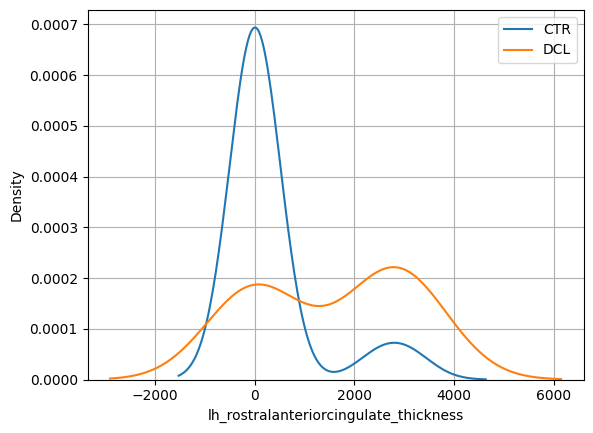

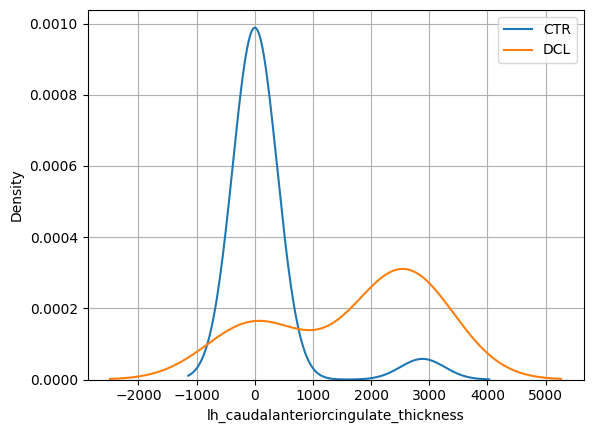

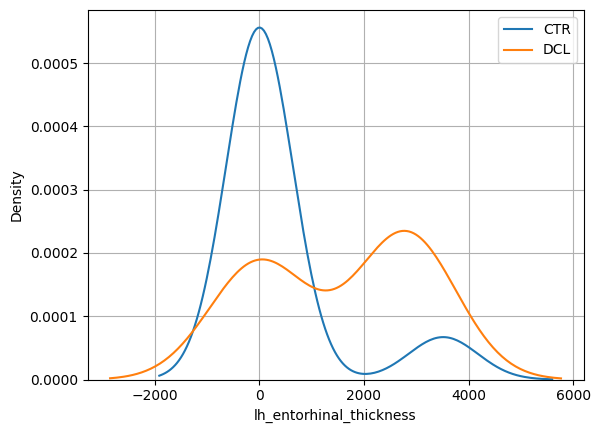

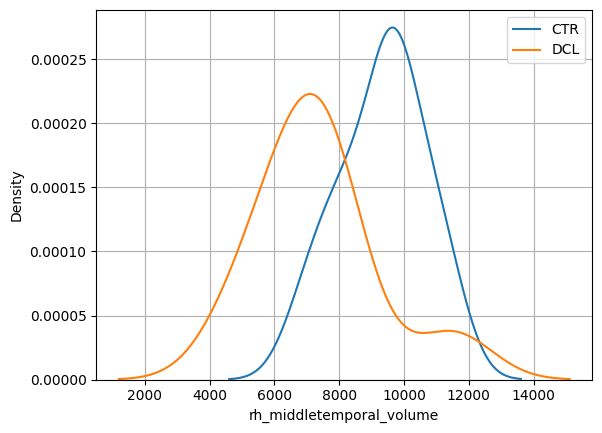

In [69]:
import seaborn as sns
for metric in f4:
    hoja, columna = metric.split('@')
    CTRSel = bd[hoja].iloc[:, 0].str.contains(r'^CTR', na=False)
    DCLSel = bd[hoja].iloc[:, 0].str.contains(r'^DCL', na=False)
    metricaCTR = bd[hoja][columna][CTRSel]
    metricaDCL = bd[hoja][columna][DCLSel]
    plt.figure()
    sns.kdeplot(metricaCTR)
    sns.kdeplot(metricaDCL)
    plt.grid()
    plt.legend(['CTR','DCL'])
    plt.show()